## Scaffold database count

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from src.utils import load_data_from_path

In [5]:
moses = load_data_from_path('data/moses.tar.xz', notation='smiles', fold=None)

In [6]:
moses = moses.to_frame()

In [9]:
chembl = load_data_from_path('data/chembl.tar.xz', notation='smiles', fold=None)

In [14]:
chembl = chembl.to_frame()

In [16]:
chembl['scaff'] = chembl['smiles'].apply(lambda x: MurckoScaffold.MurckoScaffoldSmiles(smiles=x, includeChirality=True))

In [17]:
moses['scaff'] = moses['smiles'].apply(lambda x: MurckoScaffold.MurckoScaffoldSmiles(smiles=x, includeChirality=True))

In [18]:
def mask_for_unique(scaff):
    empty = scaff == ''
    unique = ~scaff.duplicated(keep='first')
    return unique & ~empty

In [20]:
mask_for_unique(chembl['scaff']).sum()

103185

In [21]:
mask_for_unique(moses['scaff']).sum()

448814

## Saturation of augmentation

In [3]:
import pandas as pd
from rdkit import Chem
from src.utils import load_data_from_path
from src.processer import applyFncPool

In [12]:
from chemicalgof import Smiles2GoF, GoF2MoreTokens

In [3]:
zinc = load_data_from_path('data/01_zincToks.csv', notation='smiles', fold=None)

In [4]:
def augment_saturation(sm):
    G = Smiles2GoF(sm)
    size = G.number_of_nodes()
    if size ==1:
        return 1
    elif size <=3:
        return 2
    
    max_aug = avail_aug = 2
    while max_aug == avail_aug:
        max_aug+=1
        Ts = GoF2MoreTokens(G, nAugs=max_aug)
        avail_aug=len(Ts)

    return avail_aug

In [11]:
zinc = zinc.to_frame()

In [12]:
zinc['saturation'] = applyFncPool(zinc['smiles'], fnc=augment_saturation)

In [4]:
zinc = pd.read_csv('SI_tables/11_zincSaturation.csv')

<Axes: >

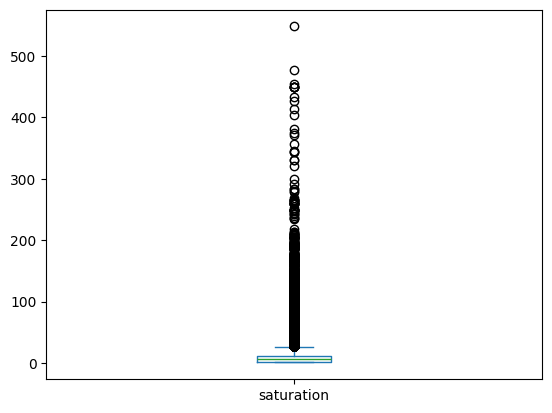

In [16]:
zinc['saturation'].plot.box()

In [19]:
zinc.saturation.describe()

count    249328.000000
mean         10.051037
std          14.229076
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         548.000000
Name: saturation, dtype: float64